In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Utiliser un chemin d'acc√®s correct sous Windows
# df = pd.read_csv(r'C:\Users\shami\Downloads\equilibre-regional-mensuel-prod-conso-brute.csv', sep=';')

# Si import depuis colab
df = pd.read_csv('/content/equilibre-regional-mensuel-prod-conso-brute.csv', sep=';')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Mois                            1560 non-null   object 
 1   Code INSEE r√©gion               1560 non-null   int64  
 2   R√©gion                          1560 non-null   object 
 3   Production totale (MWh)         1560 non-null   float64
 4   Pompage (MWh)                   1560 non-null   float64
 5   Solde √©changes physiques (MWh)  1560 non-null   float64
 6   Consommation brute (MWh)        1560 non-null   float64
 7   G√©o-shape r√©gion                1560 non-null   object 
 8   G√©o-point r√©gion                1560 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 109.8+ KB


In [4]:
df.isnull().sum()

Mois                              0
Code INSEE r√©gion                 0
R√©gion                            0
Production totale (MWh)           0
Pompage (MWh)                     0
Solde √©changes physiques (MWh)    0
Consommation brute (MWh)          0
G√©o-shape r√©gion                  0
G√©o-point r√©gion                  0
dtype: int64

In [5]:
df['Mois'] = pd.to_datetime(df['Mois'], format='%Y-%m')

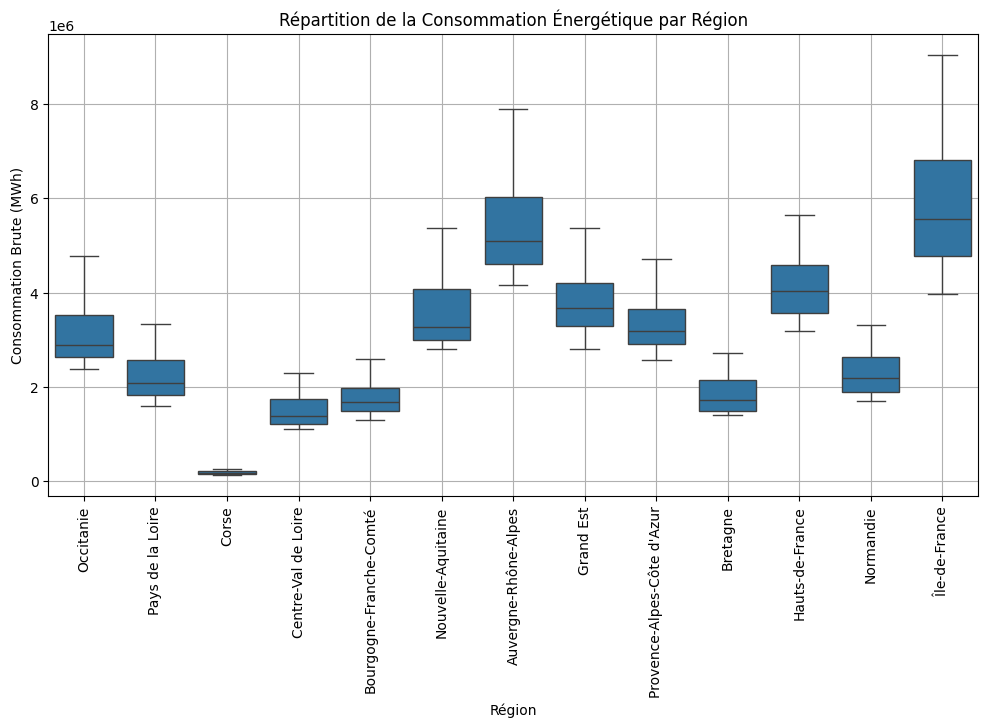

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='R√©gion', y='Consommation brute (MWh)', data=df)
plt.xticks(rotation=90)
plt.xlabel('R√©gion')
plt.ylabel('Consommation Brute (MWh)')
plt.title('R√©partition de la Consommation √ânerg√©tique par R√©gion')
plt.grid(True)
plt.show()

<ipython-input-7-90b3d62750dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R√©gion', y='Solde (MWh)', data=df, palette='coolwarm')


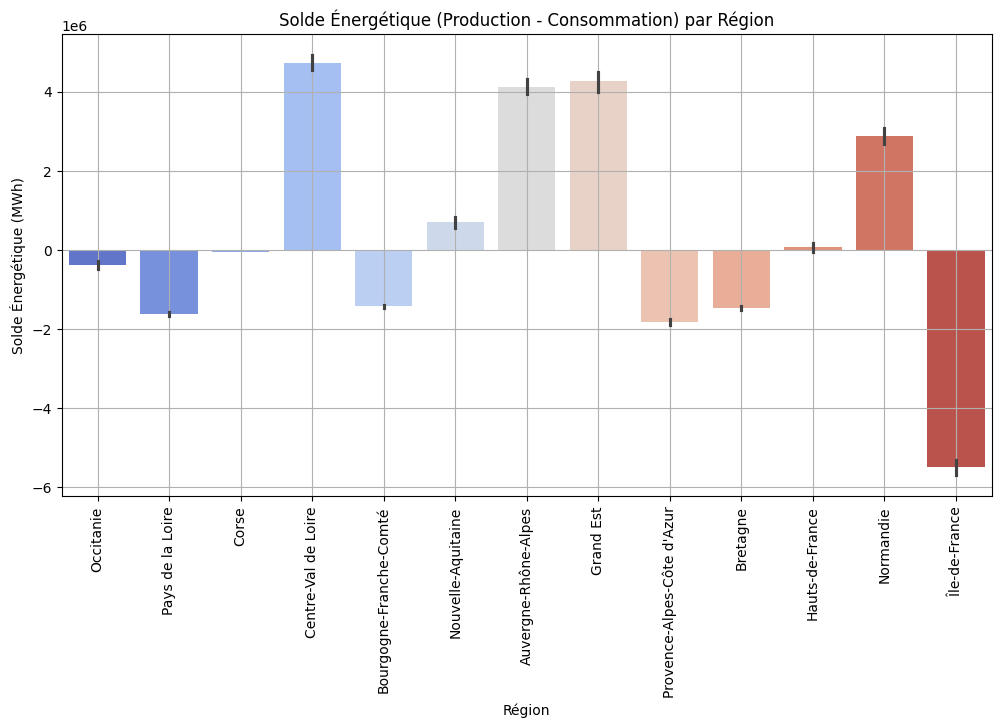

In [7]:
df['Solde (MWh)'] = df['Production totale (MWh)'] - df['Consommation brute (MWh)']

plt.figure(figsize=(12, 6))
sns.barplot(x='R√©gion', y='Solde (MWh)', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('R√©gion')
plt.ylabel('Solde √ânerg√©tique (MWh)')
plt.title('Solde √ânerg√©tique (Production - Consommation) par R√©gion')
plt.grid(True)
plt.show()

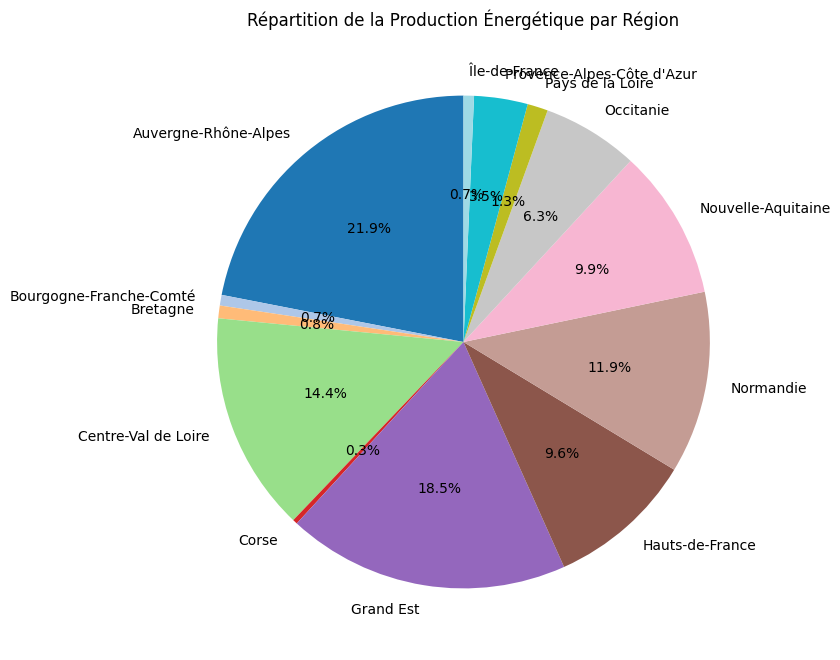

In [8]:
production_par_region = df.groupby('R√©gion')['Production totale (MWh)'].sum()

plt.figure(figsize=(8, 8))
production_par_region.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
plt.title('R√©partition de la Production √ânerg√©tique par R√©gion')
plt.ylabel('')
plt.show()


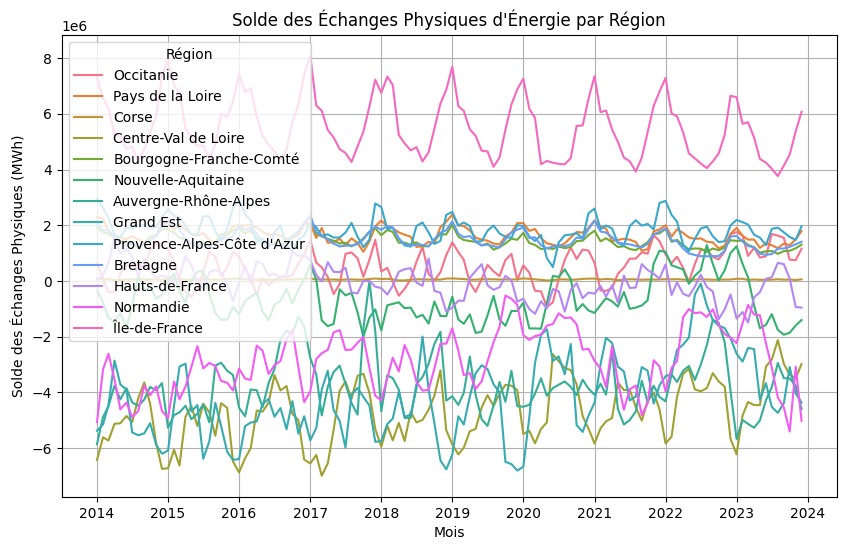

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Mois', y='Solde √©changes physiques (MWh)', hue='R√©gion')
plt.xlabel('Mois')
plt.ylabel('Solde des √âchanges Physiques (MWh)')
plt.title('Solde des √âchanges Physiques d\'√ânergie par R√©gion')
plt.grid(True)
plt.show()

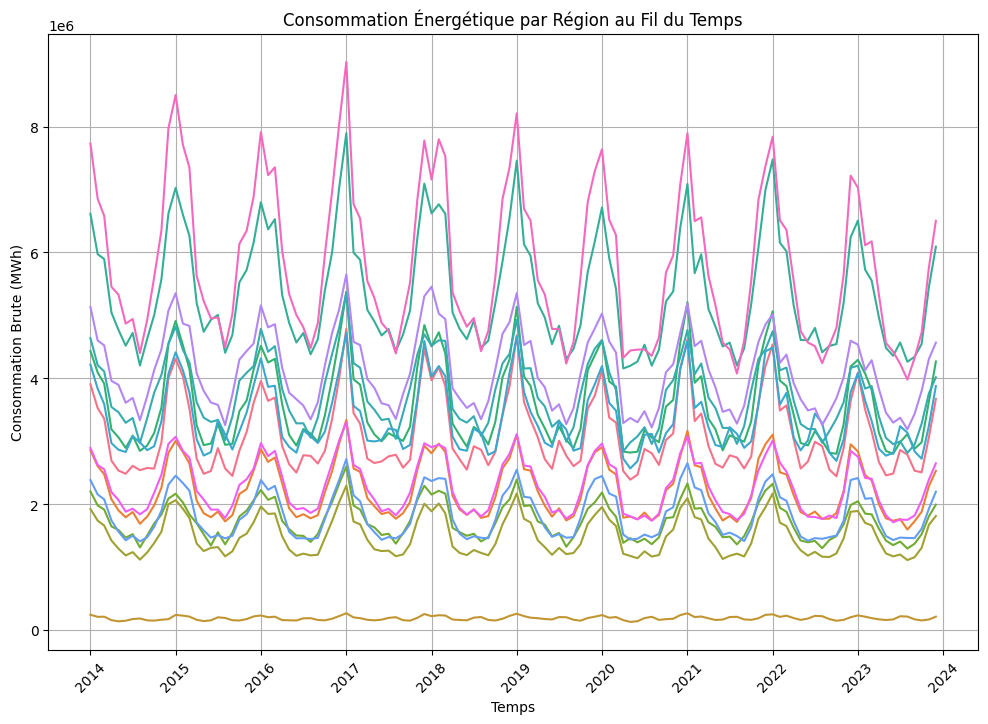

In [10]:
df['Mois'] = pd.to_datetime(df['Mois'], format='%Y-%m')

# Visualiser la consommation √©nerg√©tique pour chaque r√©gion au fil du temps
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Mois', y='Consommation brute (MWh)', hue='R√©gion', legend=False)
plt.xlabel('Temps')
plt.ylabel('Consommation Brute (MWh)')
plt.title('Consommation √ânerg√©tique par R√©gion au Fil du Temps')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

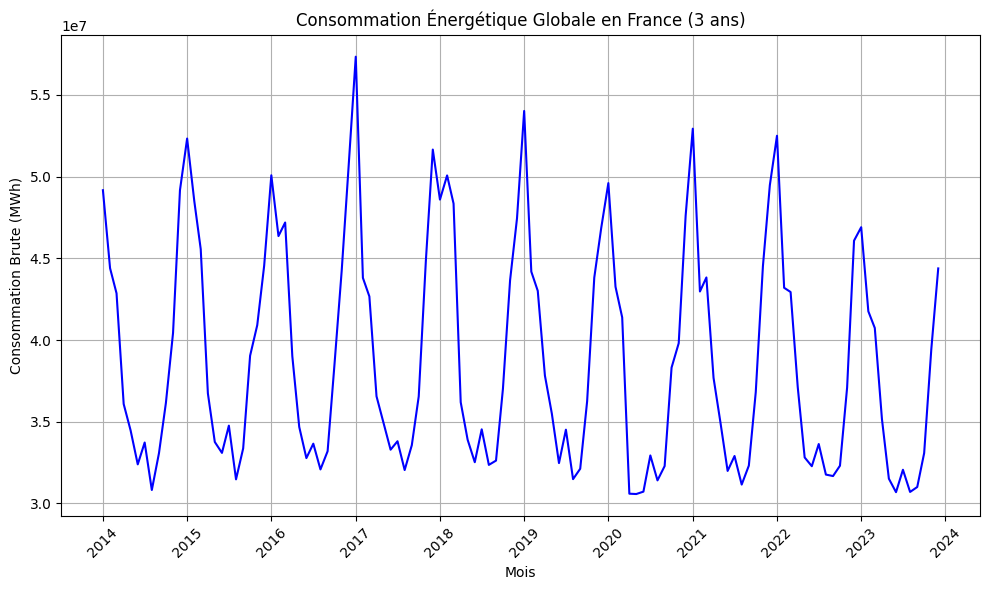

In [11]:
df_global = df.groupby('Mois')['Consommation brute (MWh)'].sum().reset_index()

# Afficher la consommation globale mensuelle
plt.figure(figsize=(10, 6))
plt.plot(df_global['Mois'], df_global['Consommation brute (MWh)'], label='Consommation R√©elle', color='blue')
plt.xlabel('Mois')
plt.ylabel('Consommation Brute (MWh)')
plt.title('Consommation √ânerg√©tique Globale en France (3 ans)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Nettoyage des donn√©es consommation :

In [12]:
# Nettoyage de la consommation
df_conso_clean = df[['Mois', 'R√©gion', 'Consommation brute (MWh)']].copy()
df_conso_clean = df_conso_clean.dropna()
df_conso_clean['Mois'] = pd.to_datetime(df_conso_clean['Mois'], format='%Y-%m')

2. Ajout du mapping et pr√©paration m√©t√©o :


In [14]:
df_mensuel = pd.read_csv('/content/df_mensuel.csv')  # Mets le chemin correct si tu l'importes

In [16]:
# üó∫Ô∏è Mapping complet D√©partement ‚Üí R√©gion
departement_to_region = {
    '01': 'Auvergne-Rh√¥ne-Alpes', '02': 'Hauts-de-France', '03': 'Auvergne-Rh√¥ne-Alpes', '04': 'Provence-Alpes-C√¥te d\'Azur',
    '05': 'Provence-Alpes-C√¥te d\'Azur', '06': 'Provence-Alpes-C√¥te d\'Azur', '07': 'Auvergne-Rh√¥ne-Alpes', '08': 'Grand Est',
    '09': 'Occitanie', '10': 'Grand Est', '11': 'Occitanie', '12': 'Occitanie', '13': 'Provence-Alpes-C√¥te d\'Azur',
    '14': 'Normandie', '15': 'Auvergne-Rh√¥ne-Alpes', '16': 'Nouvelle-Aquitaine', '17': 'Nouvelle-Aquitaine',
    '18': 'Centre-Val de Loire', '19': 'Nouvelle-Aquitaine', '2A': 'Corse', '2B': 'Corse', '21': 'Bourgogne-Franche-Comt√©',
    '22': 'Bretagne', '23': 'Nouvelle-Aquitaine', '24': 'Nouvelle-Aquitaine', '25': 'Bourgogne-Franche-Comt√©',
    '26': 'Auvergne-Rh√¥ne-Alpes', '27': 'Normandie', '28': 'Centre-Val de Loire', '29': 'Bretagne', '30': 'Occitanie',
    '31': 'Occitanie', '32': 'Occitanie', '33': 'Nouvelle-Aquitaine', '34': 'Occitanie', '35': 'Bretagne',
    '36': 'Centre-Val de Loire', '37': 'Centre-Val de Loire', '38': 'Auvergne-Rh√¥ne-Alpes', '39': 'Bourgogne-Franche-Comt√©',
    '40': 'Nouvelle-Aquitaine', '41': 'Centre-Val de Loire', '42': 'Auvergne-Rh√¥ne-Alpes', '43': 'Auvergne-Rh√¥ne-Alpes',
    '44': 'Pays de la Loire', '45': 'Centre-Val de Loire', '46': 'Occitanie', '47': 'Nouvelle-Aquitaine',
    '48': 'Occitanie', '49': 'Pays de la Loire', '50': 'Normandie', '51': 'Grand Est', '52': 'Grand Est',
    '53': 'Pays de la Loire', '54': 'Grand Est', '55': 'Grand Est', '56': 'Bretagne', '57': 'Grand Est',
    '58': 'Bourgogne-Franche-Comt√©', '59': 'Hauts-de-France', '60': 'Hauts-de-France', '61': 'Normandie',
    '62': 'Hauts-de-France', '63': 'Auvergne-Rh√¥ne-Alpes', '64': 'Nouvelle-Aquitaine', '65': 'Occitanie',
    '66': 'Occitanie', '67': 'Grand Est', '68': 'Grand Est', '69': 'Auvergne-Rh√¥ne-Alpes', '70': 'Bourgogne-Franche-Comt√©',
    '71': 'Bourgogne-Franche-Comt√©', '72': 'Pays de la Loire', '73': 'Auvergne-Rh√¥ne-Alpes', '74': 'Auvergne-Rh√¥ne-Alpes',
    '75': '√éle-de-France', '76': 'Normandie', '77': '√éle-de-France', '78': '√éle-de-France', '79': 'Nouvelle-Aquitaine',
    '80': 'Hauts-de-France', '81': 'Occitanie', '82': 'Occitanie', '83': 'Provence-Alpes-C√¥te d\'Azur',
    '84': 'Provence-Alpes-C√¥te d\'Azur', '85': 'Pays de la Loire', '86': 'Nouvelle-Aquitaine', '87': 'Nouvelle-Aquitaine',
    '88': 'Grand Est', '89': 'Bourgogne-Franche-Comt√©', '90': 'Bourgogne-Franche-Comt√©', '91': '√éle-de-France',
    '92': '√éle-de-France', '93': '√éle-de-France', '94': '√éle-de-France', '95': '√éle-de-France'
}

# üß© Ajouter la r√©gion √† partir du code d√©partement
df_mensuel['R√©gion'] = df_mensuel['Code INSEE d√©partement'].map(departement_to_region)

# üßπ Nettoyage : on garde seulement les lignes mapp√©es
df_meteo_region = df_mensuel.dropna(subset=['R√©gion'])

# üìä Moyennes r√©gionales mensuelles des temp√©ratures
df_temp_reg = df_meteo_region.groupby(['R√©gion', 'Mois'])[['TMoy (¬∞C)', 'TMin (¬∞C)', 'TMax (¬∞C)']].mean().reset_index()


In [18]:
# üîÑ Forcer le format datetime dans les deux DataFrames
df_conso_clean['Mois'] = pd.to_datetime(df_conso_clean['Mois'])
df_temp_reg['Mois'] = pd.to_datetime(df_temp_reg['Mois'])

3. Fusion

In [19]:
# Fusion m√©t√©o + conso
df_merged = pd.merge(df_conso_clean, df_temp_reg, on=['R√©gion', 'Mois'])

# Aper√ßu
df_merged.head()

Mois     R√©gion  Consommation brute (MWh)  TMoy (¬∞C)  TMin (¬∞C)  \
0 2018-01-01  Normandie                 2903465.0   7.397742   5.064903   
1 2018-01-01  Grand Est                 4518831.0   6.433968   3.904839   
2 2018-01-01   Bretagne                 2367717.0   8.816290   6.459839   
3 2018-01-01  Occitanie                 3967825.0   8.373797   5.220546   
4 2018-01-01      Corse                  219795.0  12.449839   9.090645   

   TMax (¬∞C)  
0   9.731097  
1   8.962516  
2  11.172903  
3  11.527866  
4  15.824516

Maintenant qu'on a les temp√©ratures r√©gionales ET la consommation fusionn√©es dans df_merged, on fait la r√©gression lin√©aire multiple pour pr√©dire la consommation √©nerg√©tique √† partir des temp√©ratures.

# R√©gression Multiple

In [20]:
df_merged.info()
df_merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mois                      936 non-null    datetime64[ns]
 1   R√©gion                    936 non-null    object        
 2   Consommation brute (MWh)  936 non-null    float64       
 3   TMoy (¬∞C)                 936 non-null    float64       
 4   TMin (¬∞C)                 936 non-null    float64       
 5   TMax (¬∞C)                 936 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 44.0+ KB


Mois  Consommation brute (MWh)   TMoy (¬∞C)  \
count                            936              9.360000e+02  936.000000   
mean   2020-12-15 15:19:59.999999744              2.948824e+06   13.418206   
min              2018-01-01 00:00:00              1.288290e+05    0.591750   
25%              2019-06-23 12:00:00              1.784497e+06    8.393167   
50%              2020-12-16 12:00:00              2.846366e+06   12.856375   
75%              2022-06-08 12:00:00              4.040766e+06   18.479421   
max              2023-12-01 00:00:00              8.208853e+06   26.537742   
std                              NaN              1.596835e+06    5.868014   

        TMin (¬∞C)   TMax (¬∞C)  
count  936.000000  936.000000  
mean     8.943390   17.893038  
min     -2.482750    3.666393  
25%      4.722009   12.137015  
50%      8.436840   17.362992  
75%     13.366933   23.730479  
max     22.303065   32.258710  
std      5.137256    6.781884

Il n'y a pas de valeurs manquantes, on a bien 936 valeurs non-nulles

2. R√©gression : pr√©dire la consommation √† partir des temp√©ratures

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# üéØ Variables explicatives et variable cible
X = df_merged[['TMoy (¬∞C)', 'TMin (¬∞C)', 'TMax (¬∞C)']]
y = df_merged['Consommation brute (MWh)']

# üîÄ Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üîß Mod√®le
model = LinearRegression()
model.fit(X_train, y_train)

# ‚úÖ Pr√©diction
y_pred = model.predict(X_test)

# üìä √âvaluation
print("RMSE :", mean_squared_error(y_test, y_pred, squared=False))
print("R¬≤ :", r2_score(y_test, y_pred))

TypeError: got an unexpected keyword argument 'squared'

‚úÖ R√©sultats de la r√©gression :
‚Ä¢ RMSE : 1462094.84
‚Ä¢ R¬≤ : 0.1811
    Variable   Coefficient
0  TMoy (¬∞C)  1.735745e+08
1  TMin (¬∞C) -8.701000e+07
2  TMax (¬∞C) -8.671257e+07


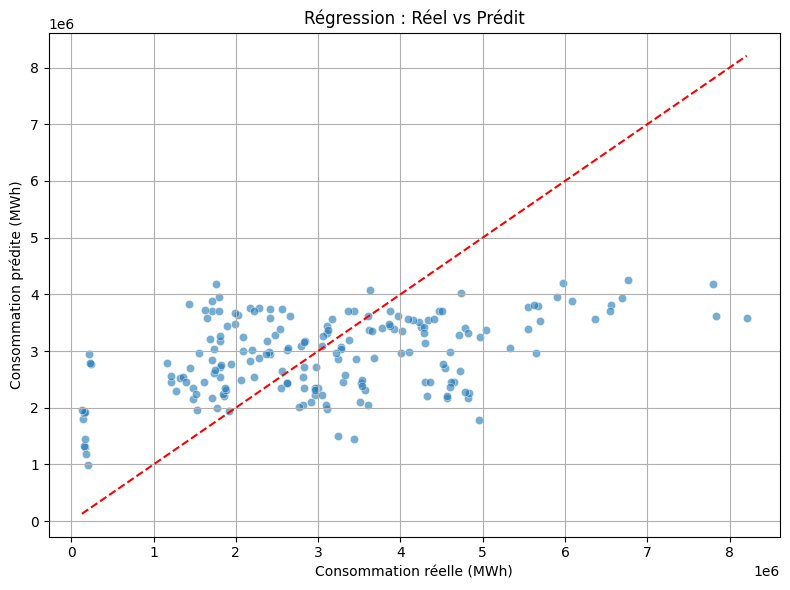

In [23]:
# üì¶ Imports utiles
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# üéØ S√©lection des variables explicatives et de la cible
X = df_merged[['TMoy (¬∞C)', 'TMin (¬∞C)', 'TMax (¬∞C)']]
y = df_merged['Consommation brute (MWh)']

# üîÄ S√©paration des donn√©es en jeu d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚öôÔ∏è Entra√Ænement du mod√®le de r√©gression lin√©aire
model = LinearRegression()
model.fit(X_train, y_train)

# üîÆ Pr√©diction sur le jeu de test
y_pred = model.predict(X_test)

# üìä √âvaluation du mod√®le
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("‚úÖ R√©sultats de la r√©gression :")
print("‚Ä¢ RMSE :", round(rmse, 2))
print("‚Ä¢ R¬≤ :", round(r2, 4))

# üìå Coefficients du mod√®le
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

# üìâ Visualisation des r√©sultats
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Consommation r√©elle (MWh)")
plt.ylabel("Consommation pr√©dite (MWh)")
plt.title("R√©gression : R√©el vs Pr√©dit")
plt.grid(True)
plt.tight_layout()
plt.show()

- Interpr√©tation des R√©sultats de la R√©gression (√©l√®ves)

Nous avons entra√Æn√© un mod√®le de r√©gression lin√©aire multiple afin de pr√©dire la consommation √©nerg√©tique mensuelle √† partir des temp√©ratures moyennes, minimales et maximales par r√©gion.
Les r√©sultats obtenus sont les suivants :

- RMSE (Root Mean Squared Error) : 1 462 094 MWh

- R¬≤ (coefficient de d√©termination) : 0,1811

Ces r√©sultats indiquent que le mod√®le n'explique qu‚Äôenviron 18 % de la variance de la consommation √©nerg√©tique.

Autrement dit, les seules temp√©ratures ne suffisent pas √† mod√©liser correctement la consommation, bien qu‚Äôelles jouent un r√¥le non n√©gligeable.

L‚Äôanalyse des coefficients du mod√®le r√©v√®le que :

Une hausse de la temp√©rature moyenne est associ√©e √† une augmentation de la consommation (coefficient positif).

En revanche, les temp√©ratures minimales et maximales ont un effet n√©gatif sur la consommation dans ce mod√®le, ce qui peut indiquer une colin√©arit√© ou un effet non lin√©aire non captur√©.

Enfin, le nuage de points comparant les valeurs r√©elles et pr√©dites montre une grande dispersion autour de la diagonale parfaite, traduisant des erreurs de pr√©diction importantes dans certaines r√©gions ou p√©riodes.



Explication pour le public

Nous avons test√© un mod√®le simple pour voir si la temp√©rature permettrait de pr√©dire la consommation d‚Äô√©nergie dans les diff√©rentes r√©gions fran√ßaises.

Le r√©sultat montre qu‚Äôil existe bien une relation entre la m√©t√©o et la consommation, mais qu‚Äôelle n‚Äôexplique qu‚Äôune partie limit√©e du ph√©nom√®ne.

En effet, la temp√©rature ne suffit pas √† elle seule : d‚Äôautres facteurs comme l‚Äôactivit√© √©conomique, les habitudes de chauffage, ou encore la population locale jouent s√ªrement un r√¥le important.

Le mod√®le a correctement rep√©r√© des tendances globales (par exemple : plus il fait froid, plus on consomme), mais il reste trop impr√©cis pour faire de bonnes pr√©visions dans tous les cas.

Cette √©tape reste importante, car elle confirme que la m√©t√©o a un impact, et nous oriente vers des mod√®les plus riches combinant d‚Äôautres donn√©es, comme les revenus, la densit√© de population ou le type de logements.

# Mod√©lisation en s√©ries temporelles

Objectif : pr√©dire la consommation √©nerg√©tique mensuelle future d‚Äôune r√©gion √† partir de ses donn√©es historiques.

1. Pr√©paration des donn√©es

In [25]:
# S'assurer que les donn√©es sont bien tri√©es par date
df_conso_clean = df_conso_clean.sort_values(['R√©gion', 'Mois'])

# Exemple : Focus sur une seule r√©gion (ex : √éle-de-France)
region = "√éle-de-France"
df_region = df_conso_clean[df_conso_clean['R√©gion'] == region][['Mois', 'Consommation brute (MWh)']].copy()
df_region.set_index('Mois', inplace=True)

2. Visualisation simple de la s√©rie


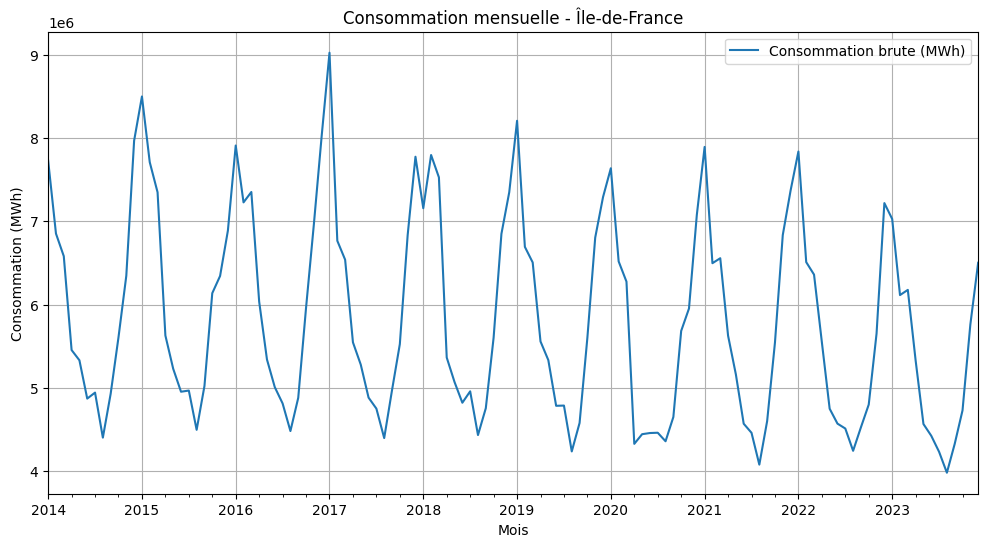

In [26]:
import matplotlib.pyplot as plt

df_region.plot(figsize=(12, 6), title=f"Consommation mensuelle - {region}")
plt.ylabel("Consommation (MWh)")
plt.grid(True)
plt.show()

Mod√®le ARIMA ou Prophet

- ARIMA (standard, simple √† tester rapidement)

- Prophet (plus visuel, plus flexible, mais n√©cessite installation)

Utilisons Prophet pour une pr√©diction plus parlante.

Pr√©paration des donn√©es

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpounb99vu/kj5uc87h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpounb99vu/rr90_yvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77804', 'data', 'file=/tmp/tmpounb99vu/kj5uc87h.json', 'init=/tmp/tmpounb99vu/rr90_yvn.json', 'output', 'file=/tmp/tmpounb99vu/prophet_modelq31_hvik/prophet_model-20250324194157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:41:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:41:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

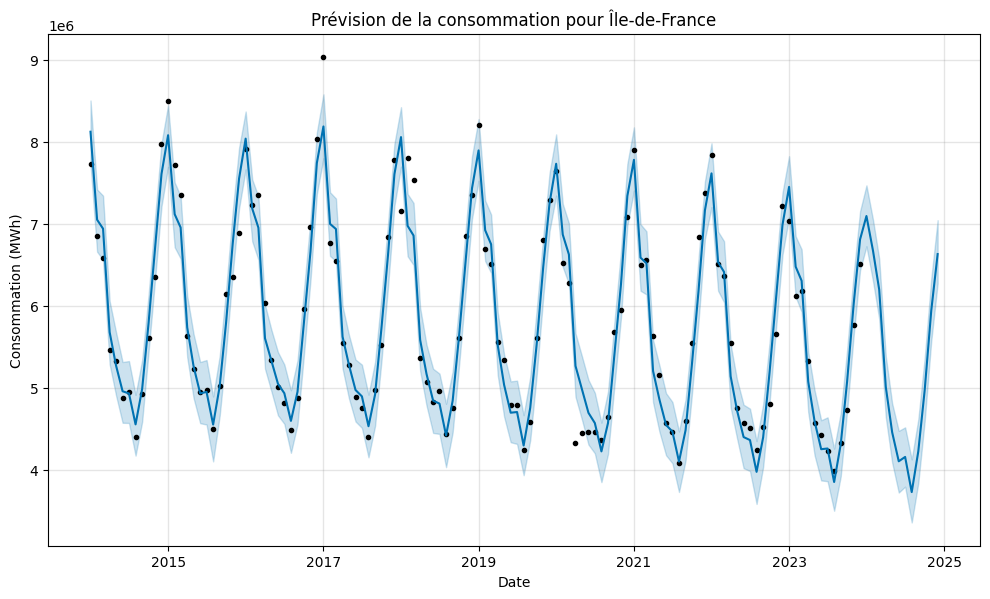

In [29]:
from prophet import Prophet

# Focus sur une r√©gion
region = "√éle-de-France"
df_prophet = df_conso_clean[df_conso_clean['R√©gion'] == region][['Mois', 'Consommation brute (MWh)']].copy()

# Renommage pour Prophet
df_prophet.rename(columns={"Mois": "ds", "Consommation brute (MWh)": "y"}, inplace=True)

# V√©rification
df_prophet.head()


# √âtape 3 : Entra√Ænement du mod√®le
model = Prophet()
model.fit(df_prophet)

# √âtape 4 : G√©n√©rer les dates futures
future = model.make_future_dataframe(periods=12, freq='M')
future.tail()

#  √âtape 5 : Pr√©diction et visualisation
forecast = model.predict(future)

# üìà Visualisation automatique avec Prophet
fig1 = model.plot(forecast)
plt.title(f"Pr√©vision de la consommation pour {region}")
plt.xlabel("Date")
plt.ylabel("Consommation (MWh)")
plt.grid(True)
plt.show()

Analyse ‚Äì R√©gion : √éle-de-France

Ce graphique montre l'√©volution de la consommation √©nerg√©tique mensuelle en √éle-de-France, ainsi que sa projection future sur 12 mois.

üîπ Ligne bleue : pr√©diction de la consommation.

üîπ Zone bleue claire : intervalle de confiance (incertitude de la pr√©vision).

üîπ Points noirs : donn√©es historiques r√©elles.

Observations :

- Forte saisonnalit√© :
chaque ann√©e, la consommation suit un cycle tr√®s net ; Pics en hiver (chauffage √©lectrique), et Creux en √©t√©.

- Pr√©vision r√©aliste : Le mod√®le capte bien cette saisonnalit√© et l‚Äôextrapole sur les mois √† venir.

- Incertitude ma√Ætris√©e : La zone bleue reste relativement √©troite, ce qui montre que le mod√®le est confiant dans ses pr√©visions.

√Ä retenir :

En √éle-de-France, la consommation d‚Äô√©lectricit√© est fortement influenc√©e par les saisons, avec un pic en hiver. Prophet parvient √† capter cette logique et peut donc √™tre utilis√© pour anticiper la demande √©nerg√©tique et mieux la g√©rer.

# Comparaison avec PACA

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpounb99vu/_vxio9d7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpounb99vu/hb4p9u3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40851', 'data', 'file=/tmp/tmpounb99vu/_vxio9d7.json', 'init=/tmp/tmpounb99vu/hb4p9u3j.json', 'output', 'file=/tmp/tmpounb99vu/prophet_modeln5506vvc/prophet_model-20250324194823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

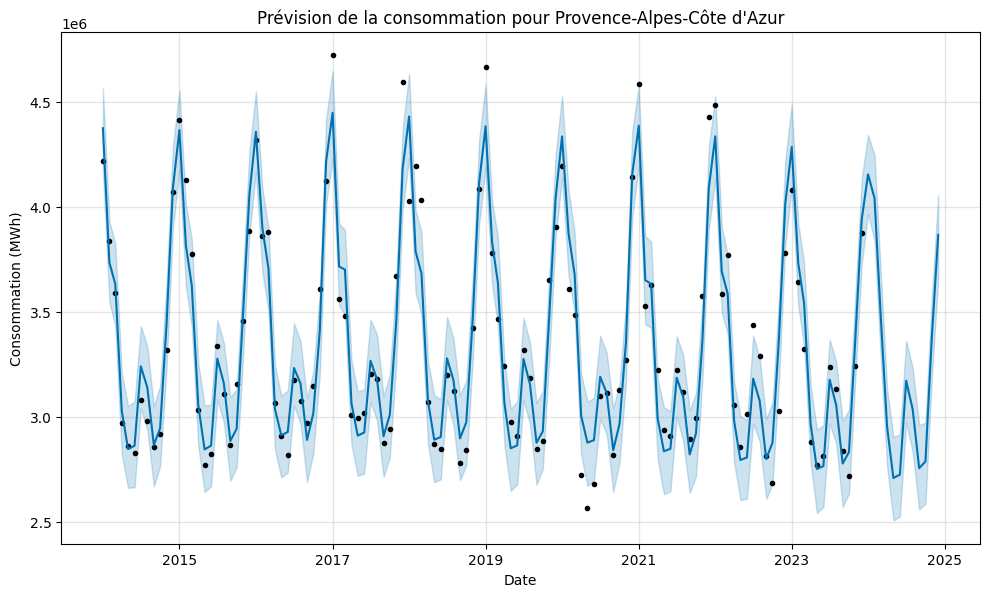

In [30]:
# üìç Nouvelle r√©gion √† analyser
region = "Provence-Alpes-C√¥te d'Azur"

# Pr√©parer les donn√©es pour Prophet
df_prophet = df_conso_clean[df_conso_clean['R√©gion'] == region][['Mois', 'Consommation brute (MWh)']].copy()
df_prophet.rename(columns={"Mois": "ds", "Consommation brute (MWh)": "y"}, inplace=True)

# Entra√Æner un nouveau mod√®le Prophet
model = Prophet()
model.fit(df_prophet)

# G√©n√©rer les pr√©visions pour les 12 prochains mois
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Visualisation
fig2 = model.plot(forecast)
plt.title(f"Pr√©vision de la consommation pour {region}")
plt.xlabel("Date")
plt.ylabel("Consommation (MWh)")
plt.grid(True)
plt.show()

Comparaison !

üîπ 1. Niveaux de consommation :

IDF consomme nettement plus d‚Äô√©nergie que PACA :

‚û§ En moyenne entre 6 et 9 millions de MWh/mois.

‚û§ PACA varie entre 2,8 et 4,5 millions de MWh/mois.

üëâ Cela refl√®te la densit√© de population, le poids √©conomique et les besoins en chauffage/climatisation.

üîπ 2. Saisonnalit√© :

Les deux r√©gions pr√©sentent une forte saisonnalit√© annuelle, avec un pic hivernal tr√®s marqu√© (notamment en d√©cembre-janvier) et un creux estival.

En PACA, les pics sont parfois plus brusques ‚Üí peut indiquer une sensibilit√© accrue aux variations de temp√©rature, notamment pour la climatisation.

üîπ 3. Tendance et stabilit√© :

√éle-de-France montre une tendance l√©g√®rement d√©croissante depuis 2021. Cela peut indiquer une meilleure efficacit√© √©nerg√©tique ou un ralentissement √©conomique.

PACA reste plus stable, avec des fluctuations r√©guli√®res autour d‚Äôune moyenne constante.

EN RESUME ;

La mod√©lisation confirme que l‚Äô√éle-de-France est de loin la r√©gion la plus √©nergivore, avec une tendance √† la baisse.

En comparaison, PACA consomme moins mais reste tr√®s sensible aux cycles saisonniers.

Ce type d‚Äôanalyse permet d‚Äôanticiper les besoins √©nerg√©tiques r√©gionaux et d‚Äôadapter les politiques publiques.

#  Clustering
Objectif : Identifier des groupes de r√©gions ayant un profil de consommation √©nerg√©tique similaire, √©ventuellement influenc√©s par la m√©t√©o.

In [31]:
# Base fusionn√©e utilis√©e pour la r√©gression
df_merged

Mois                      R√©gion  Consommation brute (MWh)  \
0   2018-01-01                   Normandie                 2903465.0   
1   2018-01-01                   Grand Est                 4518831.0   
2   2018-01-01                    Bretagne                 2367717.0   
3   2018-01-01                   Occitanie                 3967825.0   
4   2018-01-01                       Corse                  219795.0   
..         ...                         ...                       ...   
931 2021-06-01                    Bretagne                 1511395.0   
932 2021-06-01  Provence-Alpes-C√¥te d'Azur                 2908481.0   
933 2021-07-01               √éle-de-France                 4457591.0   
934 2021-07-01          Nouvelle-Aquitaine                 3093549.0   
935 2021-10-01            Pays de la Loire                 2092927.0   

     TMoy (¬∞C)  TMin (¬∞C)  TMax (¬∞C)  
0     7.397742   5.064903   9.731097  
1     6.433968   3.904839   8.962516  
2     8.816290   6.459839  11.172903  
3     8.373797   5.220546  11.527866  
4    12.449839   9.090645  15.824516  
..         ...        ...        ...  
931  16.182083  12.656583  19.707250  
932  21.824222  16.477722  27.171278  
933  19.699960  15.239637  24.160524  
934  19.941317  15.208710  24.673683  
935  13.337161   8.742000  17.932387  

[936 rows x 6 columns]

On va regrouper par r√©gion, pour calculer :

- La moyenne annuelle de consommation (Consommation brute (MWh))

- La temp√©rature moyenne annuelle (TMoy (¬∞C)), √©ventuellement TMin et TMax.

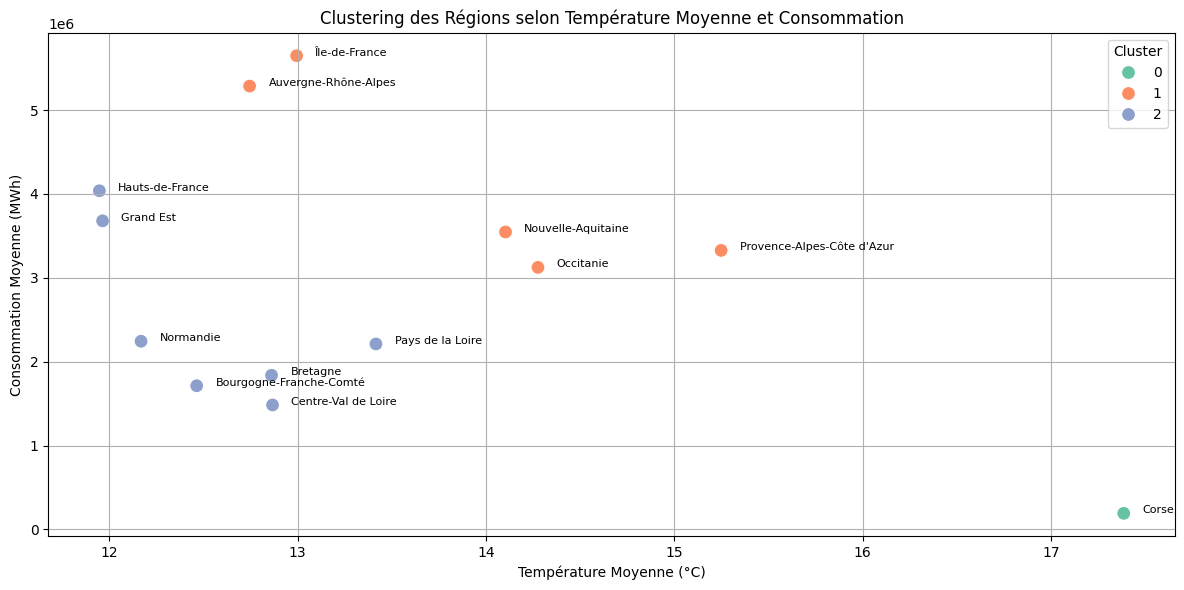

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# √âtape 1 : Moyennes par r√©gion
df_clust = df_merged.groupby('R√©gion')[
    ['Consommation brute (MWh)', 'TMoy (¬∞C)', 'TMin (¬∞C)', 'TMax (¬∞C)']
].mean().reset_index()

# √âtape 2 : Standardisation des donn√©es
features = df_clust.drop(columns='R√©gion')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# √âtape 3 : Clustering avec KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_clust['Cluster'] = kmeans.fit_predict(X_scaled)

# √âtape 4 : Visualisation des clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_clust,
    x='TMoy (¬∞C)', y='Consommation brute (MWh)',
    hue='Cluster', palette='Set2', s=100
)

# Annoter les r√©gions
for i, row in df_clust.iterrows():
    plt.text(row['TMoy (¬∞C)'] + 0.1, row['Consommation brute (MWh)'], row['R√©gion'], fontsize=8)

plt.title("Clustering des R√©gions selon Temp√©rature Moyenne et Consommation")
plt.xlabel("Temp√©rature Moyenne (¬∞C)")
plt.ylabel("Consommation Moyenne (MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()




Observations :

Le clustering met en √©vidence trois grands profils r√©gionaux :

1. Cluster 0 (Corse) : R√©gion atypique avec une temp√©rature tr√®s √©lev√©e et une consommation tr√®s faible.

2. Cluster 1 : Regroupe les r√©gions √† forte consommation (√éle-de-France, Auvergne-Rh√¥ne-Alpes, PACA, etc.), souvent denses et urbanis√©es, avec des temp√©ratures mod√©r√©es √† √©lev√©es.

3. Cluster 2 : Comprend des r√©gions √† consommation plus mod√©r√©e, et temp√©ratures plus basses, souvent moins peupl√©es ou moins industrialis√©es.

# D√©tection d'anomalies

Objectif : D√©tecter les mois avec une consommation anormale

-> On va utiliser Isolation Forest, un algorithme bien adapt√© √† la d√©tection d‚Äôoutliers.

In [34]:
# Imports en haut du notebook
from sklearn.ensemble import IsolationForest

# 1. Pr√©paration des donn√©es
df_anomaly = df_conso_clean.copy()
df_anomaly['Mois'] = pd.to_datetime(df_anomaly['Mois'])

# Pour chaque r√©gion, appliquer le mod√®le
results = []

for region in df_anomaly['R√©gion'].unique():
    df_region = df_anomaly[df_anomaly['R√©gion'] == region].copy()

    # Model sur la consommation seule (peut √™tre enrichi)
    X = df_region[['Consommation brute (MWh)']]
    model = IsolationForest(contamination=0.05, random_state=42)
    df_region['Anomalie'] = model.fit_predict(X)

    results.append(df_region)

# 2. Regroupement des r√©sultats
df_anomalies = pd.concat(results)

# 3. Affichage des anomalies (anomalie = -1)
df_anomalies_only = df_anomalies[df_anomalies['Anomalie'] == -1]
df_anomalies_only.head()

Mois                R√©gion  Consommation brute (MWh)  Anomalie
35   2017-01-01  Auvergne-Rh√¥ne-Alpes                 7895235.0        -1
544  2017-12-01  Auvergne-Rh√¥ne-Alpes                 7092864.0        -1
566  2019-01-01  Auvergne-Rh√¥ne-Alpes                 7457570.0        -1
147  2020-04-01  Auvergne-Rh√¥ne-Alpes                 4156370.0        -1
1172 2021-12-01  Auvergne-Rh√¥ne-Alpes                 6993220.0        -1

üìà Option de visualisation rapide pour une r√©gion :

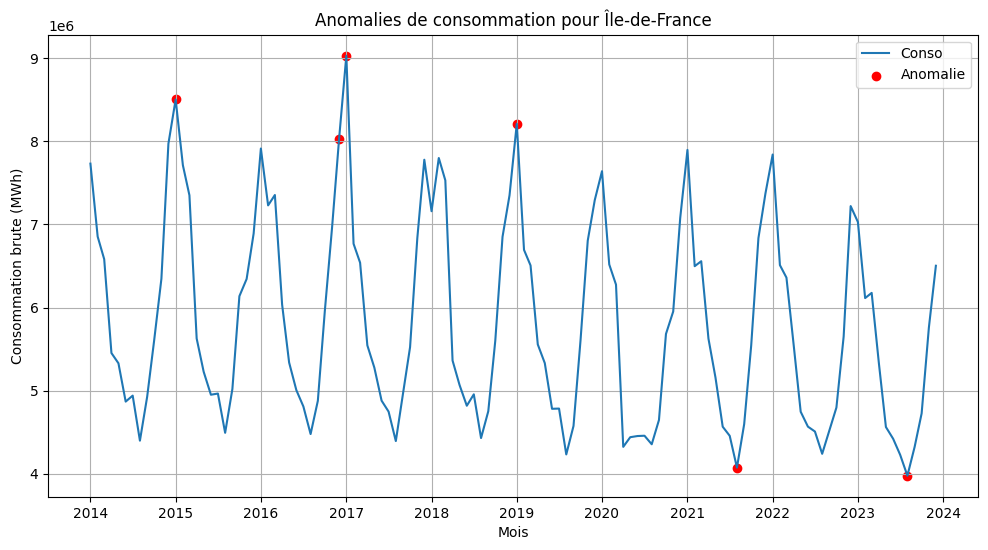

In [35]:
import matplotlib.pyplot as plt

region = "√éle-de-France"
df_plot = df_anomalies[df_anomalies['R√©gion'] == region]

plt.figure(figsize=(12,6))
plt.plot(df_plot['Mois'], df_plot['Consommation brute (MWh)'], label='Conso')
plt.scatter(
    df_plot[df_plot['Anomalie'] == -1]['Mois'],
    df_plot[df_plot['Anomalie'] == -1]['Consommation brute (MWh)'],
    color='red', label='Anomalie'
)
plt.title(f"Anomalies de consommation pour {region}")
plt.xlabel("Mois")
plt.ylabel("Consommation brute (MWh)")
plt.legend()
plt.grid(True)
plt.show()


Interpr√©tation :    

Les points rouges indiquent les mois identifi√©s comme anormaux (outliers) par l‚Äôalgorithme Isolation Forest.

On observe des pics tr√®s √©lev√©s vers 2015, 2017, et 2019. Ces anomalies sont probablement li√©es √† :

- des vagues de froid (augmentation du chauffage),

- des pics industriels,

- ou des erreurs / ruptures de donn√©es.

Inversement, les points tr√®s bas en 2021 et 2023-2024 pourraient s‚Äôexpliquer par :

- des confinements li√©s √† la pand√©mie (activit√© √©conomique r√©duite),

- des hivers exceptionnellement doux.

üëâ On peut donc supposer que l‚Äôalgorithme a bien capt√© des ruptures ou extr√™mes dans la tendance de consommation.

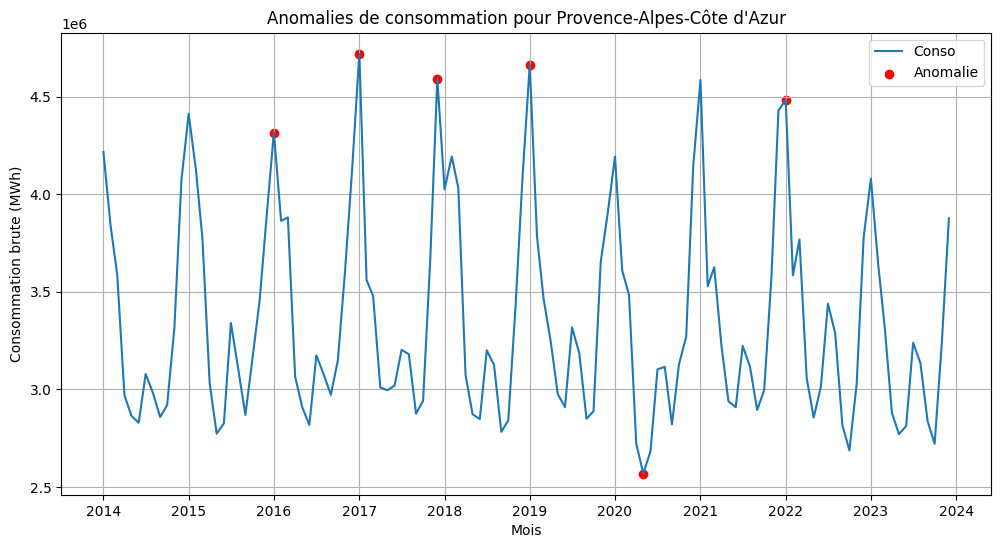

In [36]:
import matplotlib.pyplot as plt

region = "Provence-Alpes-C√¥te d'Azur"  # üåç Changement de r√©gion
df_plot = df_anomalies[df_anomalies['R√©gion'] == region]

plt.figure(figsize=(12,6))
plt.plot(df_plot['Mois'], df_plot['Consommation brute (MWh)'], label='Conso')
plt.scatter(
    df_plot[df_plot['Anomalie'] == -1]['Mois'],
    df_plot[df_plot['Anomalie'] == -1]['Consommation brute (MWh)'],
    color='red', label='Anomalie'
)
plt.title(f"Anomalies de consommation pour {region}")
plt.xlabel("Mois")
plt.ylabel("Consommation brute (MWh)")
plt.legend()
plt.grid(True)
plt.show()

Comparaison g√©n√©rale :       

1. √éle-de-France :

- R√©gion la plus peupl√©e de France ‚Üí consommation globalement plus √©lev√©e (jusqu'√† 9 millions de MWh/mois).

- Les pics de consommation anormaux d√©tect√©s sont tous tr√®s √©lev√©s : souvent des hivers rigoureux ou des mois exceptionnellement froids.

- Anomalies √©galement d√©tect√©es autour de 2023 avec des creux soudains, potentiellement li√©s √† : une baisse d‚Äôactivit√© (COVID, t√©l√©travail, sobri√©t√© √©nerg√©tique), ou des erreurs de mesure/reporting.

2. Provence-Alpes-C√¥te d‚ÄôAzur :

- Niveau de consommation inf√©rieur (autour de 3‚Äì4,5 millions de MWh).

- Les anomalies d√©tect√©es ne sont pas toujours des pics extr√™mes, mais souvent des √©carts soudains par rapport √† la saisonnalit√©.

- Les creux comme en 2020 semblent aussi li√©s √† des chocs externes (crise COVID ?).

- Montre une saisonnalit√© plus marqu√©e avec des hivers moins exigeants √©nerg√©tiquement.

Les anomalies √©nerg√©tiques sont bien plus marqu√©es en √éle-de-France, o√π l'effet de masse (population, b√¢timents, transports) rend la consommation tr√®s sensible aux variations climatiques ou √©conomiques.

En PACA, les pics sont plus mod√©r√©s mais des fluctuations inhabituelles sont aussi d√©tect√©es, t√©moignant de la diversit√© des usages r√©gionaux.

Ces r√©sultats confirment l‚Äôutilit√© de mod√®les de d√©tection d‚Äôanomalies pour pr√©venir ou expliquer des comportements √©nerg√©tiques anormaux.

# Conclusion de la Partie 2 ‚Äì Mod√©lisation
Les diff√©rentes approches de mod√©lisation ont permis de mieux comprendre les dynamiques de consommation √©nerg√©tique √† l‚Äô√©chelle r√©gionale :

1. La r√©gression a montr√© que les temp√©ratures jouent un r√¥le significatif mais pas suffisant √† elles seules pour pr√©dire la consommation.

2. Les s√©ries temporelles (Prophet) se sont r√©v√©l√©es efficaces pour anticiper les variations mensuelles de consommation, avec des pr√©visions robustes et visuellement coh√©rentes.

3. Le clustering a permis d‚Äôidentifier des groupes de r√©gions ayant des profils similaires de temp√©rature et de consommation, mettant en √©vidence des typologies √©nerg√©tiques.

4. La d√©tection d‚Äôanomalies a r√©v√©l√© des mois atypiques de consommation, ouvrant la voie √† des analyses plus fines sur les causes (√©v√©nements climatiques, crise √©nerg√©tique, etc.).

Ces r√©sultats posent une base solide pour aller plus loin avec :

l‚Äôint√©gration de donn√©es socio-√©conomiques (revenus, logement, population‚Ä¶),

et la cr√©ation d‚Äôun dashboard interactif pour permettre une exploration dynamique et personnalis√©e des donn√©es.